In [1]:
from IPython.display import display
import ipywidgets
import importlib
import utils
import PIL
import numpy as np

In [2]:
def custom_underline_checker(char_img: PIL.Image) -> bool:
    char_img = char_img.crop((0, char_img.height*0.82, char_img.width, 0.9*char_img.height))
    char_np = np.array(char_img.convert('L'))
    balck_pixels = np.count_nonzero(char_np <= 50)
    total_pixels = char_np.shape[0] * char_np.shape[1]
    black_percentage = balck_pixels / total_pixels
    return black_percentage > 0.6

def custom_char_modifier(char, char_img):
    if char.rect.width() < 1 or char.rect.height() < 1:
        return
    char.underlined = custom_underline_checker(char_img)


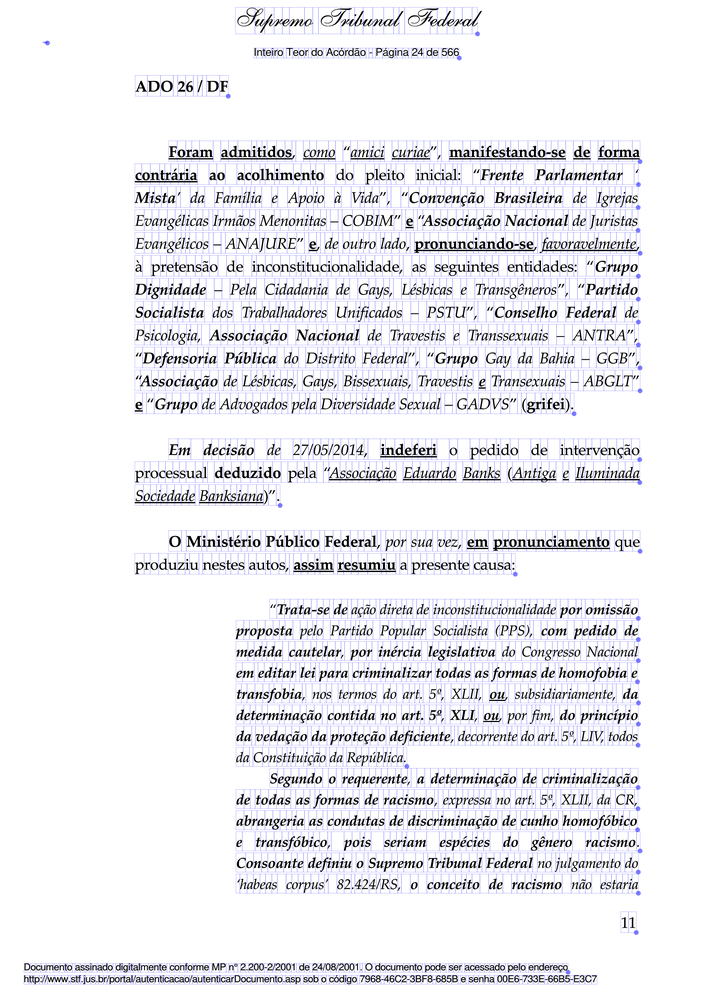
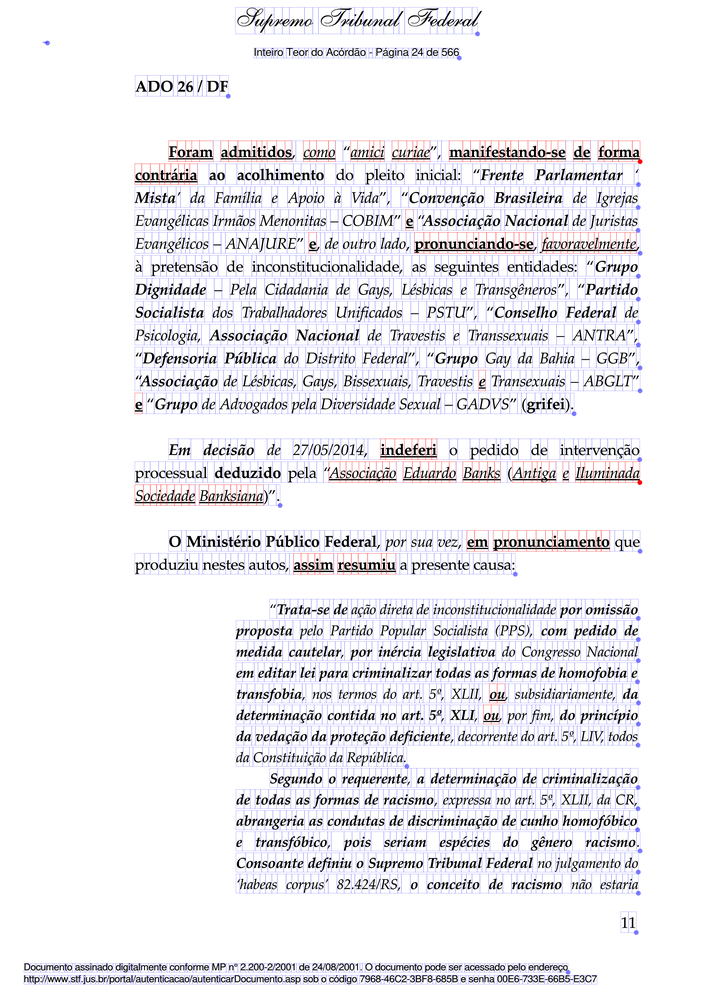

In [3]:
importlib.reload(utils)
doc = utils.PdfDocument('ado26.pdf')
page = doc.get_page(24)
img1 = page.highlight_chars()
page.apply_char_modifier_function(custom_char_modifier)
img2 = page.highlight_chars()
img1.thumbnail((1000, 1000), PIL.Image.LANCZOS)
img2.thumbnail((1000, 1000), PIL.Image.LANCZOS)
utils.display_pil([img1, img2])

# Note: the dots on the image show size-less characters (e.g. '\n')